In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from simulator import evaluate_controller

In [2]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
	return data

In [3]:
COMBINED_FPS_PATH = "../assets/result/accuracy/Combined-FPS.json"
REQUIRED_THROUGHPUT = load_json(COMBINED_FPS_PATH)
RESAMPLING_INTERVAL = 15

In [4]:
ENERGY_SCALE = 10**6
NUM_FRAME = 1800

In [5]:
ENERGY_RESULT_PATH = '../assets/result/energy/YOLOv8-1800-960.json'
ENERGY_RESULT = load_json(ENERGY_RESULT_PATH)

In [6]:
CONTROLLER_RESULT_PATH = '../assets/result/optimizer_energy/DVFSController-Simulator-Results.json'
SELECTED_FREQUENCIES = load_json(CONTROLLER_RESULT_PATH)['frequencies']
SUGGESTION_LATENCY = load_json(CONTROLLER_RESULT_PATH)['suggestion_latency']
UPDATE_LATENCY = load_json(CONTROLLER_RESULT_PATH)['update_latency']

In [7]:
EFFICIENT_POWER_RESULT_PATH = '../assets/result/energy/Dict-Per-Real-Second-960.json'
EFFICIENT_POWER_RESULT = load_json(EFFICIENT_POWER_RESULT_PATH)

In [8]:
def plot_one_line(xs, ys, x_label, y_label, title, legend_label, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(18, 6))
	
	ax1.plot(xs, ys, color='black', label=legend_label)

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	# plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [9]:
def plot_two_line(xs, y1s, y2s, x_label, y_label, title, legend_label1, legend_label2, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(18, 6))
	
	ax1.plot(xs, y1s, color='black', label=legend_label1)
	ax1.plot(xs, y2s, color='orange', label=legend_label2)

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [10]:
def round_floats_to_sigfigs(input_list, sigfigs):
	return [round(number, sigfigs) for number in input_list]

def duplicate_elements_time(input_list):
	result = [0]
	for item in input_list:
		if item == input_list[-1]:
			result.append(item)
			break
		result.append(item)
		result.append(item)
	return result

def duplicate_elements_accuracy(input_list):
	result = []
	for item in input_list:
		result.append(item)
		result.append(item)
	return result

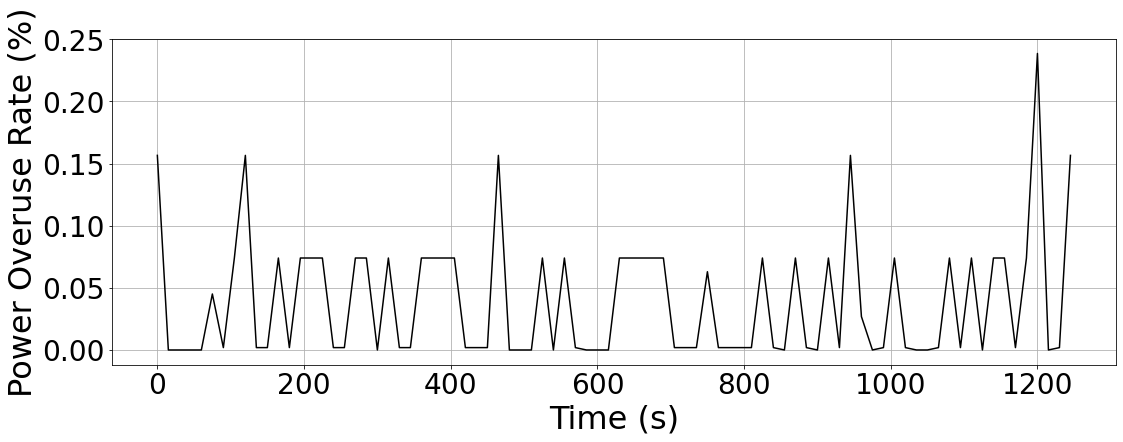

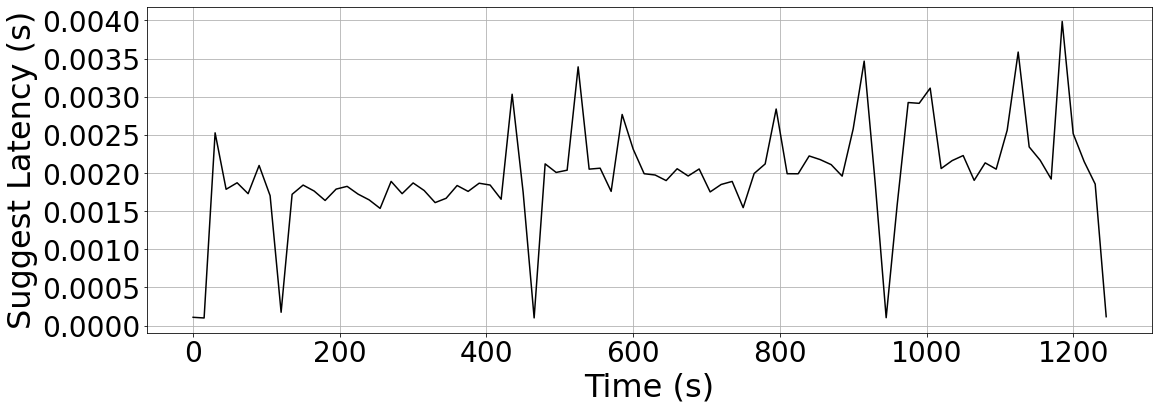

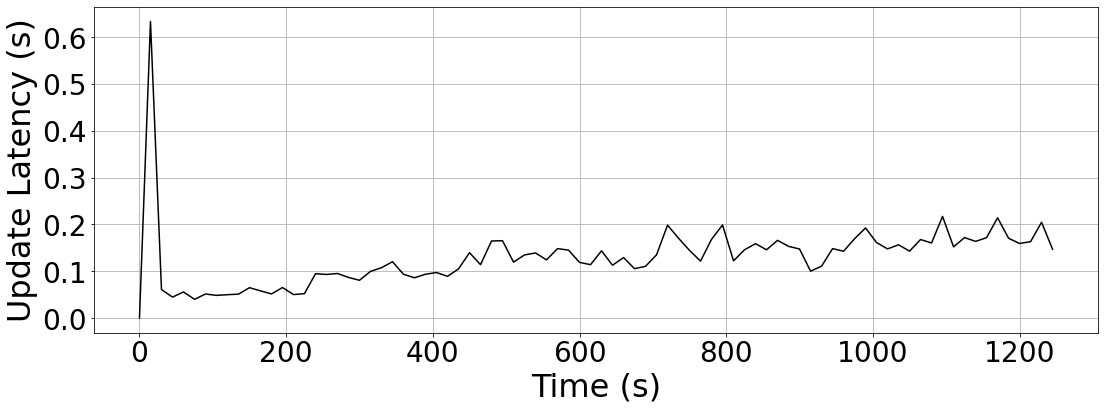

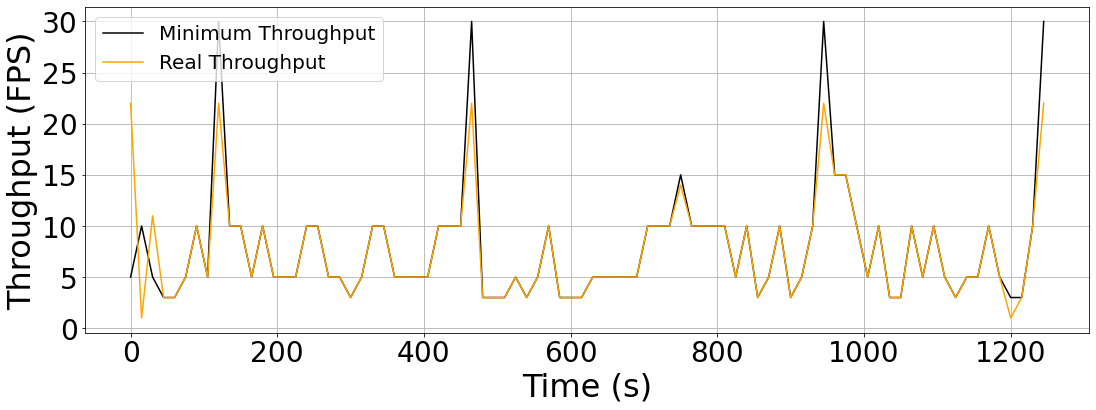

Average Power Overuse Rate: 0.03907825042838932
Average Throughput Surplus Rate: 0.023919753086419755
Average Throughput Shortage Rate: 0.04685831409969341
Average Suggestion Latency: 0.001966016633169992
Average Update Latency: 0.1291478474934896


In [11]:
time, power_overuse_rate_list, output_throughput_list, output_throughput_surplus_list, output_throughput_shortage_list, output_throughput_diff_list = evaluate_controller(SELECTED_FREQUENCIES, ENERGY_RESULT, EFFICIENT_POWER_RESULT, NUM_FRAME)

plot_one_line(time, power_overuse_rate_list, 'Time (s)', 'Power Overuse Rate (%)', '', '')
plot_one_line(time, SUGGESTION_LATENCY, 'Time (s)', 'Suggest Latency (s)', '', '')
plot_one_line(time, UPDATE_LATENCY, 'Time (s)', 'Update Latency (s)', '', '')
plot_two_line(time, REQUIRED_THROUGHPUT, output_throughput_list, 'Time (s)', 'Throughput (FPS)', '', 'Minimum Throughput', 'Real Throughput')

print(f"Average Power Overuse Rate: {np.average(np.array(power_overuse_rate_list))}")
print(f"Average Throughput Surplus Rate: {np.average(np.array(output_throughput_surplus_list))}")
print(f"Average Throughput Shortage Rate: {np.average(np.array(output_throughput_shortage_list))}")
print(f"Average Suggestion Latency: {np.average(np.array(SUGGESTION_LATENCY))}")
print(f"Average Update Latency: {np.average(np.array(UPDATE_LATENCY))}")